#### Question 4

Produce a sequence {X<sub>k</sub>} where p<sub>j</sub> = $\frac{p}{j}$ for j = 1,2, ... , 60 where 𝑝 is a constant for you to determine. [This is equivalent to spinning the minute hand on a clock and observing the stopping position if  P[stop on minute j = $\frac{p}{j}$ ]. Generate a histgram. Define the random variable N<sub>j</sub> = min {k: X<sub>k</sub> = j}. Simulate sampling from N<sub>60</sub>. Estimate E[N<sub>60</sub>] and Var[N<sub>60</sub>]. Compare you estimates with the theoretical
values.
   

In [54]:
import numpy as np
import matplotlib.pyplot as plt


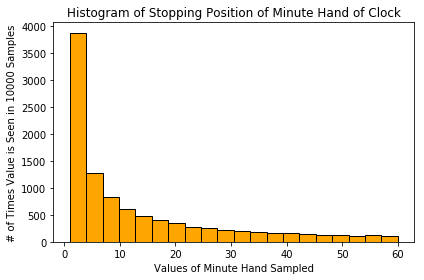

In [57]:
# first step is to figure out what the value of p should be. 
# summation of pj from 1 to 60 should equal to 1
probs = []
sum_i = 0
for i in range(1,61):
    sum_i += (1/i)
    
p = 1/(sum_i)    

for j in range(1,61):
    pj = p/j
    probs.append(pj)


X_k_samples = np.random.choice(np.arange(1,61), p = probs, size = 10000) # sample size of 10000
#print(X_k_samples == 60)
plt.hist(X_k_samples, bins = 20, edgecolor = 'black', facecolor = 'orange') #histogram for 10000 samples
plt.xlabel("Values of Minute Hand Sampled")
plt.ylabel("# of Times Value is Seen in 10000 Samples")
plt.title("Histogram of Stopping Position of Minute Hand of Clock")
plt.tight_layout()
plt.savefig("Project3_Q4_1.png")
plt.show()


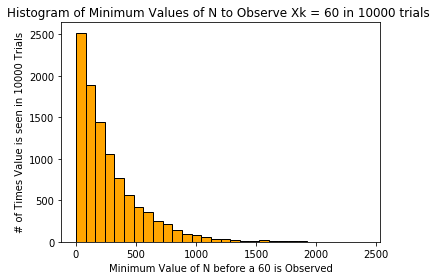

The theoretical expected value is  280.79222477710414
The theoretical variance is  78563.48127049867
The sample expected value is  276.5055
The sample variance is  75503.67916975002


In [56]:
# Part two, generating the random variable for the minimum amount of samples needed to see Xk = 60

N = 0
outcome = 0

N_samples = [] # list of all the n samples

for i in range(0,10000):
    N = 0
    outcome = 0
    
    while outcome != 60:
        outcome = np.random.choice(np.arange(1,61), p = probs, size = 1) 
        # sampling one value each from Xk
        N += 1 #incrementing N until the value of 60 is seen from the sampling
    N_samples.append(N)

plt.hist(N_samples, bins = 30, edgecolor = 'black', facecolor = 'orange') 
#histogram for 10000 trials of this sampling
plt.xlabel("Minimum Value of N before a 60 is Observed")
plt.ylabel("# of Times Value is seen in 10000 Trials")
plt.title("Histogram of Min. Values of N to Observe Xk = 60 in 10000 trials")
plt.tight_layout()
plt.savefig("Project3_Q4_2.png")
plt.show()

prob60 = probs[59]
theory_e = 1/prob60
theory_var = theory_e * theory_e - theory_e * theory_e * prob60 
print("The theoretical expected value is ", str(theory_e))
print("The theoretical variance is ", str(theory_var))

sample_e = np.mean(N_samples)
sample_var = np.var(N_samples)
print("The sample expected value is ", str(sample_e))
print("The sample variance is ", str(sample_var))


##### Q4 Analysis

- For the first histogram, the majority of the values of the stopping position are between 1 and 10, and it drops of exponentially as the value of j increases. 
- For the second histogram, the expected value and variance from the experiment are close to that of the theoretical expected value and variance. The sample expected value is 284.82, while the theoretical one is 280.8. This means that we had to sample that many times from the distribution before a value of 60 was observed on the clock. The fact that this histogram was generated from 10000 experiments points to the precision of the sample expected value in relation the theoretical expected value. 
- Interestingly, the sample and theoretical variances are also close to each other, but are significantly larger than the mean. This can also be seen in the histogram, where the values of N range 1 to greater than 1500, which is visual proof of a very large variance.